## `INTERN ON LetsGrowMore(LGM)`
## ` Beginner Level Task:`
### `Task no. 03 - Music Recommendation System-ContentBasedApproach`
`Dataset from url :` https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

<img src="task-2-3.png" />

# `Abstract :` 

A recommender (or recommendation) system (or engine) is a filtering system which aims is to predict a rating or preference a user would give to an item like a song, in our case.

### `Two major approaches for solving this problem`

i) Content-Based Recommendation System:

Content-based methods gives recommendations based on the similarity of two song contents or attributes.

ii) Collaborative-Filtering Based Recommendation System:

Collaborative methods make a prediction on posible preferences using a matrix with ratings on different songs as well as based on choices/preferences of similar users too.


### `STEPS : `

1) Importing Libraries and Loading datasets

2) Exploratoty Data Analysis(EDA) & Visualization

3) Data Preprocessing & Preparing Main datasets.

4) Computing Similarities betn Songs using Cosine_similarities.

5) Constructing Content Based Recommendation System.

6) Making Recommendation of Songs to Users.

7) Acknowledgement and References


### In this project, i 've gone through `CONTENT-BASED RECOMMENDATION APPROACH` 

JUST HAVE A CUP OF COFFEE IN FRONT OF YOU AND EXOLORE 😊 !!! 

## `Let's Dive into the project`

## `Step-1:` Importing required important libraries and loading datasets...

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  DATASETS

Detailed Descriptions of Datasets: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

`train.csv`
a) msno: user id


In [74]:
train_df = pd.read_csv("train.csv", nrows=20000) # Considering only Twenty Thousands tuples for our dataset.
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [75]:
song_df = pd.read_csv("songs.csv", nrows=20000)
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [76]:
song_extra_info_df = pd.read_csv("song_extra_info.csv")
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## `Step-2:` Exploratory Data Analysis (EDA) & Visualization

In [77]:
# Checking for null values...
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

We are only using `msno` and `song_id` attribute of this table, and these attributes dont have any `missing values`

In [78]:
song_df.isna().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

We will use all attributes columns except `song_length` and `language`. 
For this, we will handle in Preprocessing steps.

In [79]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [80]:
song_extra_info_df['name'] = song_extra_info_df['name'].dropna(axis=0)
song_extra_info_df['name'].isna().sum()

2

In [81]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

We will only use `song_id` and `name`. So, removing NaNs or Missing Values from that columns.

In [82]:
# Let's see shape,dtypes and info of dataset...

In [83]:
train_df.shape

(20000, 6)

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                20000 non-null  object
 1   song_id             20000 non-null  object
 2   source_system_tab   19933 non-null  object
 3   source_screen_name  19424 non-null  object
 4   source_type         19950 non-null  object
 5   target              20000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [85]:
train_df.dtypes

msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 int64
dtype: object

In [86]:
song_df.shape

(20000, 7)

In [87]:
song_df.dtypes

song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

In [88]:
song_extra_info_df.shape

(2295971, 3)

In [89]:
song_extra_info_df.dtypes

song_id    object
name       object
isrc       object
dtype: object

### LET'S VISUALIZE OUR DATASETS....


For this project, we are using content as song features like genre_ids, artist_name, composer, lyricist for our Content-Based Recommendation System.
So let's focus on these features.

In [90]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [91]:
song_df['genre_ids'].value_counts()

465                7972
1609               1185
2022               1062
921                 823
958                 788
                   ... 
118|1259              1
184                   1
465|2189|367          1
786|139|125|109       1
786|691               1
Name: genre_ids, Length: 274, dtype: int64

### `Bar Plot`

Let's plot top 7 count_values along with their Genre IDs

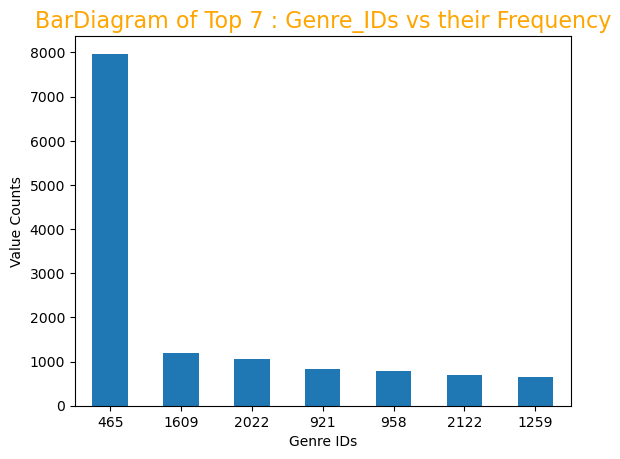

In [92]:
song_df['genre_ids'].value_counts()[:7].plot(kind='bar')
plt.xlabel('Genre IDs')
plt.ylabel('Value Counts')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0) # gca() returns current axes (or standalone visualization) in the current figure
plt.title("BarDiagram of Top 7 : Genre_IDs vs their Frequency",
          color="orange",
          fontsize=16);


From this, Our `song_df` dataset contains large no. of songs with Genre_id with `value 465 `

## `Step-3:` Data Preprocessing & Preparing Main Datasets.... 

In [93]:
song_df.isna().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

### Filling NaNs/Missing Values with Empty String.


In [94]:
song_df['genre_ids'].fillna(' ', inplace=True)
song_df['composer'].fillna(' ', inplace=True)
song_df['lyricist'].fillna(' ', inplace=True)

song_df.isna().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [95]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

We don't use `isrc` attribute in our main dataset. No need to clean it.

In [96]:
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

We only need `msno` and `song_id` in our main datset. No need to clean it.

### Preparing Main Dataset

In [97]:
main_df = train_df.drop(['source_system_tab', 'source_screen_name', 'source_type', 'target'], axis = 1)
main_df.head()

,msno,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=


Renaming `msno` to `user_id` for better understanding...

In [98]:
## Renaming msno to user_id
main_df.rename(columns={'msno': 'user_id'}, inplace=True)
main_df.head()

,user_id,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=


Merging `main_df` with `song_df`

Droping `song_length` and `language` columns

In [99]:
## Merging main_df and song_df and Droping Columns

main_df = main_df.merge(song_df, on='song_id')
main_df = main_df.drop(['song_length', 'language'], axis=1)
main_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩


In [100]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


Merging `song_extra_info_df` and `main_df`

Droping `isrc` attribute.

In [101]:
## Merging and Droping

main_df = main_df.merge(song_extra_info_df, on='song_id').drop('isrc', axis=1)
main_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好


Renaming `name` attribute with `song_name`

In [102]:
## Renaming 
main_df.rename(columns={'name' : 'song_name'}, inplace=True)
main_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好


### Performing Preprocessing for Our constructed `main_df` Dataset

In [103]:
main_df['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139|125|109              7
726                      7
451                      7
437                      7
958                      6
786|947                  6
465|1259                 4
1011                     4
786                      4
947                      4
691                      3
921|465                  3
430                      3
921|458                  2
458|1287                 2
698                      2
444|1259                 2
829                      2
850                      2
1152                     1
880|458                  1
465|829                  1
864|857|850|843          1
465|798                  1
474                      1
864|850|726|857|843      1
3

You can see there are lots of `|` in genre_ids. 
Replacing `|` with `' '`

In [104]:
main_df['genre_ids'] = main_df['genre_ids'].str.replace('|', ' ', regex=True)
main_df['genre_ids'].value_counts().tail()

1609 465    1
465 2122    1
423         1
726 242     1
437 850     1
Name: genre_ids, dtype: int64

Without using regex=True, Warining Appears:
FutureWarning: The default value of regex will change from True to False in a future version

Reason: In Series.str.replace, current default value for the param:regex is set to True. In a future version, it will be defaulted to false: regex=False.
This means in the future, if you want to use regex with str.replace, you will need to set the regex param to True.

In [105]:
### lets see all tuples values...
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows') 

In attributes `artist_name`, `composer` and `lyricist`, there are '/' and '|' symbols,

So, replacing that by " ".

In [106]:
main_df['artist_name'] = main_df['artist_name'].str.replace( '|',' ', regex=True)
main_df['artist_name'] = main_df['artist_name'].str.replace( '/',' ',  regex=True)

main_df['lyricist'] = main_df['lyricist'].str.replace( '|',' ', regex=True)
main_df['lyricist'] = main_df['lyricist'].str.replace( '/',' ', regex=True)

main_df['composer'] = main_df['composer'].str.replace( '|',' ', regex=True)
main_df['composer'] = main_df['composer'].str.replace( '/',' ', regex=True)


### Converting string into Lower Case....

In [107]:
main_df['artist_name']  = main_df['artist_name'].str.lower()
main_df['lyricist']  = main_df['lyricist'].str.lower()
main_df['composer']  = main_df['composer'].str.lower()

### Creating new column `song_details` with values concatenating corresoponding values of attributes `artist_name`, `composer`, `lyricist` .

In [108]:
main_df['song_details'] = main_df['artist_name'] + ' ' +  main_df['lyricist'] + ' ' +  main_df['composer'] + ' ' +  main_df['genre_ids']

In [109]:
main_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


In [110]:
main_df.user_id.value_counts()

EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: user_id, Length: 975, dtype: int64

### Codes which  are written below was just used for debugging and testing purpose at the beginning Phase.

user_history = main_df.groupby(['user_id'])['song_name']


for key, item in user_history:
    print(key)
    print(item)
    
user_history_list = user_history.apply(list)
user_history_list
user_history_list.keys()

main_df['song_name'].iloc[566]

main_df['song_name'][566]

def user_songs_history(userID):


    user_history_values = user_history_list[userID]
    print(f"User ID: {userID}\n\n")
    print("Songs History:\n")
    for i in range(len(user_history_values)):
        print(f"{i+1}. {user_history_values[i]}\n")
   
user_songs_history('+6qXndZ2nMn0cyAWZlBfOBGVqolfO2CRo1MdVznK7Kg=')


## `Step-4:` Computing Similarities betn Songs using Cosine_similarities.


### Before the computation of Cosine Similarity, we need to remove duplicated or redundant values in song_details column which consists value append from genre_ids, artist_name, composer and lyricist. So, removing user_id from main_df and storing into temp_df. Now, temp_df consists of some duplicated tuples and we remove duplicated tuples and compute cosine_similarity. 

In [111]:
main_df.duplicated().sum()

0

As main_df contains user_id so there will be rarely duplicated tuples. Here its zero. As Different users can listen to same song so we need to remove user_id and see for duplicate tuples in our dataset.

In [112]:
temp_df = main_df.copy() # Making duplicate of Original dataset.
temp_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


# Computing Cosine Similarities Matrix for unique `song_details` values / for every unique songs with each others.

In [113]:
temp_df.song_details.duplicated().sum()

876

In [114]:
temp_df.shape

(1509, 8)

In [115]:
temp_df.duplicated().sum()

0

In [116]:
temp_df = temp_df.drop('user_id', axis=1) # Removing user_id from temp_df

In [117]:
temp_df.head()

,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


In [118]:
temp_df.duplicated().sum()

810

There are `810`duplicated tuples.

### Note : These things or concepts or ideas will only be known after proper debugging of outputs at evey steps. So, don't be panic if gets difficult for you to understand. Give some time and do experiments.

In [119]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(699, 7)

In [120]:
1509-810

699

There are `699` unique songs in our Dataset.

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf vectorizer

tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

# Fit and transform 

tfidf_matrix = tfidf.fit_transform(temp_df['song_details'])

In [122]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(tfidf_matrix)

In [123]:
cosine_similarities[:2]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.03069817, ..., 0.        , 0.        ,
        0.        ]])

In [124]:
similarities = {} ## For storing similarity matrix for every songs.

## Commented lines are just for debugging and analysis purpose.

We are storing `50 most similar songs` for each songs of our dataset  in `Similarities Dictionary`.

The code below will store similarities dictionary as : 

{song1: [( cosine_similarity, song_name, artist_name), ... to 50 most similar songs with song1],

 song2: [( cosine_similarity, song_name, artist_name), ... to 50 most similar songs with song2],
 
 ....
 
 ....}

In [125]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs.
    
    similar_score = cosine_similarities[i]
    
#     print(similar_score)
#     print(f"Max:{max(similar_score)}")
#     print(f"Min: {min(similar_score)}")
    
    similar_indices = cosine_similarities[i].argsort()
    
#     print(f"Argsot: {similar_indices}")
#     print(f"INDEX-4328: {similar_score[4328]}")
#     print(similar_indices)
    
# Retrieving 50 index values with maximum similarity and maximum similarity index value will be from the end of similar_indices list
    similar_indices = similar_indices[:-50:-1] 
    
#     print(f"Similar INdices: {similar_indices}")
    
 # After that, we'll store in similarities each name of the 50 most similar songs.
 # Except the first one that is the same song.
    similarities[temp_df['song_name'].iloc[i]] = [(cosine_similarities[i][x], temp_df['song_name'].iloc[x], temp_df['artist_name'].iloc[x]) for x in similar_indices][1:]
   

In [133]:
similarities

{'Panda': [(0.6372222477539108, 'Tiimmy Turner', 'desiigner'),
  (0.2015057132188654, 'Know Better', 'various artists'),
  (0.17767445140893937,
   "우리 지금 만나 Let's Meet Now (feat. 장기하와 얼굴들 Kiha & The Faces)",
   'leessang'),
  (0.1593882964940167, 'Sometimes', 'geeks'),
  (0.13735827152835292, 'Turn Around [5|4|3|2|1]', 'flo rida'),
  (0.13735827152835292,
   "Where'd You Go (feat. Holly Brook & Jonah Matranga)",
   'fort minor'),
  (0.13735827152835292, 'Pull Up (feat. Lil Uzi Vert)', 'wiz khalifa'),
  (0.12423277761241787, '你不愛我', '玖壹壹'),
  (0.12347165298926878,
   'Same Love (feat. Mary Lambert)',
   'macklemore & ryan lewis'),
  (0.08657924206912064, '心電感應', 'under lover (地下情人)'),
  (0.08603402744413446, 'La La La', 'sam smith'),
  (0.07976388273961801, 'Sing For The Moment', 'eminem'),
  (0.06128570622004471, 'Trap Queen', 'fetty wap'),
  (0.05607870563074463, 'Why You Always Hatin?', 'yg'),
  (0.03903227669831226, 'Me| Myself & I', 'g-eazy'),
  (0.0, '野子 (Ye Zi)', 'various artist

## Its output takes lots of pages in git,Showing Output of Similarities like this

{
#### 'Panda': [(0.6372222477539108, 'Tiimmy Turner', 'desiigner'),

  (0.2015057132188654, 'Know Better', 'various artists'),
  (0.17767445140893937,
  
   "우리 지금 만나 Let's Meet Now (feat. 장기하와 얼굴들 Kiha & The Faces)",
   'leessang'),
   
   ..... 
   ....
   ....
   
  (0.0, '放我的真心在你的手心', '張智成 (z-chen chang)'),
  
  (0.0, '差一點我們會飛', '哪一天我們會飛')],
  
  
 #### '我過的很好': 
 
  [(0.9685502100586879, '幸福離我好遠', '莊心妍'),
 
  (0.9685502100586879, '不想管太多', '莊心妍'),
  
  (0.1673097962986712, '我知道', '莊心妍'),
  
  (0.09196377314756442, '青春無敵 (Invincible)', 'various artists'),
  
  ..... 
  .....
  
  (0.042026430702879265, '上行之詩 (Pilgrim Song)', 'various artists'),
  
  (0.0416696437255625, '再遇見 (Met Again)', '蘇打綠 (sodagreen)'),
  
  (0.041355296602618524, '長大以後的世界 (Grown Up)', '王源 (roy wang)')]
  
  .......}



### Just print in jupyter notebook and see the results.

## `Step-5:` Constructing Content Based Recommendation System.

`Constructor function` will initialize computed similarities dict for every songs to similarity_mat.Also, stores user's playlist history as a list into user_history_list. ( This was experimented before and are provided in markdown section. Scroll above how i come to this step.)

`PrintRecommendedSongs` will print mentioned number of most similar and disinct songs(not already in his/her previous playlist) for user according to user's previous playlist.

`user_songs_history` will return user's playlist history using userID.

`return_most_similar_songs` will return recommended songs for particular songs according to cosine similarities values.

`recommend` will take recommendation dictionary with keys: userID and number_songs. It will recommend mentioned number of distinct and most similar songs for the particular user with that userID



In [127]:
class ContentBasedRecommender:
    def __init__(self, similarity_matrix):
        self.similarity_mat = similarity_matrix
        self.user_history_list = main_df.groupby(['user_id'])['song_name'].apply(list)
    
    def PrintRecommendedSongs(self, song, recom_song, number_songs, user_play_list):
        print(f"Length of Possible Recommended Songs : {len(recom_song)}\n")
        print(f'The {number_songs} recommended songs are:')
        i=0
        k=0
        temp_recom_list = []
        while(i!=number_songs):
            
            if k < len(recom_song): # Handling index out of range error...
                    if recom_song[k][1] in user_play_list or recom_song[k][1] in temp_recom_list:
                        k = k+1
                    else:
                        if recom_song[k][0] != 0.0:   # Enters if similarity_score less than 0.0
                            print(f"Number {i+1}:")
                            print(f"{recom_song[k][1]} by {recom_song[k][2]} with {recom_song[k][0]} similarity score") 
                            print("--------------------")
                            temp_recom_list.append(recom_song[k][1])

                            # print(temp_recom_list)

                            i=i+1
                            k=k+1
                        else: ## Not Displaying songs with cosine_similarity score of Zero. You can customize this setting yourself.
                            print("Opps!!! No Similar Songs for Recommendations. You can go through most popular songs of this week!!!")
                            break

            else:
                print("Opps !!! There are no more similar songs!!!")
                break
        
                

            
    def user_songs_history(self, userID):
        user_history_values = self.user_history_list[userID]
        user_playlist = []
        print(f"User ID: {userID}\n\n")
        print("Songs History:\n")
        for i in range(len(user_history_values)):
            song  = user_history_values[i]
            print(f"{i+1}. {song}\n")
            user_playlist.append(song)
        return user_playlist
        
        
    def return_most_similar_song(self, song, number_songs):
         recom_song = self.similarity_mat[song][:number_songs]
         return recom_song
        
    
    
    def recommend(self, recommendation):
            # Get playlist of particular user
            user_play_list = self.user_songs_history(recommendation['userID_recom'])
            # Get number of songs to recommend
            recom_song_list = []
            number_songs = recommendation['number_songs']
            
            # Get the number of songs most similars from matrix similarities
            
            for song in user_play_list:
                 recom_song_list.extend(self.return_most_similar_song(song, number_songs))
#           print("I am Correct...")
#           print(recom_song_list)
            recom_song_list = sorted(recom_song_list, reverse=True)
            # print each item
#           print(recom_song_list)
            self.PrintRecommendedSongs(song=song,
                                       recom_song=recom_song_list,
                                       number_songs=number_songs,
                                       user_play_list=user_play_list)


## `Step-6:` Making Recommendation of Songs to user 

Making Recommendation of songs to Users according to userID and number of songs user requested.

In [128]:
recommedations = ContentBasedRecommender(similarities)

In [129]:
recommendation = {
    "userID_recom": main_df['user_id'].iloc[1],
    "number_songs": 50 
}

In [130]:
recommedations.recommend(recommendation)

User ID: hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=


Songs History:

1. Panda

Length of Possible Recommended Songs : 48

The 50 recommended songs are:
Number 1:
Tiimmy Turner by desiigner with 0.6372222477539108 similarity score
--------------------
Number 2:
Know Better by various artists with 0.2015057132188654 similarity score
--------------------
Number 3:
우리 지금 만나 Let's Meet Now (feat. 장기하와 얼굴들 Kiha & The Faces) by leessang with 0.17767445140893937 similarity score
--------------------
Number 4:
Sometimes by geeks with 0.1593882964940167 similarity score
--------------------
Number 5:
Where'd You Go (feat. Holly Brook & Jonah Matranga) by fort minor with 0.13735827152835292 similarity score
--------------------
Number 6:
Turn Around [5|4|3|2|1] by flo rida with 0.13735827152835292 similarity score
--------------------
Number 7:
Pull Up (feat. Lil Uzi Vert) by wiz khalifa with 0.13735827152835292 similarity score
--------------------
Number 8:
你不愛我 by 玖壹壹 with 0.124232777612417

### Further Scope & Enhancements:

1) If you can display output in dataframe table, it might look beautiful and clear.

2) Also, you can append listened songs by user from recommended list and make it realistic.

3) Also , you can encode and decode chinese like language and so on. So, you can improve alot!

As it was for intern. Limiting my features to this much. 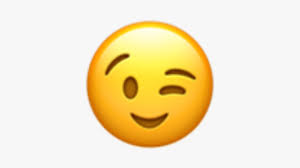

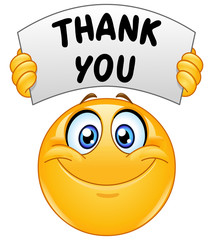

# Thank You for Visiting and Exploring my ideas and codes. Glad to share this to you.


### `Finally completed my third task successfully`

## Thanking to `LetsGrowMore` and Respected sir `Aman Kesarwami` for this 

## golden opportunity to improve and enhance myself in the field of

## DataScience


### Also, i would like to thanks my mate Aman Poddar for coordination.

His linkedin id : https://www.linkedin.com/in/amanpoddar375/

###  References:

https://github.com/ugis22/music_recommender
https://towardsdatascience.com/the-abc-of-building-a-music-recommender-system-part-i-230e99da9cad


### Contact  me:

linkedin: https://www.linkedin.com/in/abhishek-thapa-b9a733199/

### Youtube Channel : `64bitCODING`

Plese do Like and Suscribe and Support me.Thanks every passionate learner in advance!
Also, Dont forget to reference my contents if you are using anywhere.

<img src="yt-channel.png"/>

Copyright © 2022, Abhishek Thapa Inc. All Rights Reserved